In [1]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X,y = make_moons(500,noise=0.1)

y_ = [-1 if t == 0 else 1 for t in y]

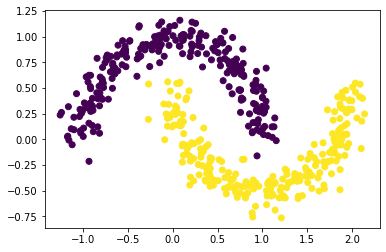

In [3]:
plt.scatter(X[:,0],X[:,1],c=y_);

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD, Adagrad, RMSprop, Adam

In [5]:
X = X.astype('float32')
y = y.astype('float32')

In [6]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2,20)
        self.fc2 = nn.Linear(20,40)
        self.fc3 = nn.Linear(40,20)
        self.fc4 = nn.Linear(20,1)
        self.relu = nn.ReLU()
        

        
    def forward(self,x):
        u = self.fc1(x)
        z = self.relu(u)
        u = self.fc2(z)
        z = self.relu(u)
        u = self.fc3(z)
        z = self.relu(u)
        u = self.fc4(z)
        z = torch.sigmoid(u)

        return z
        
    def predict(self,A):
        with torch.no_grad():
            output = self.forward(A)
            output.cpu()
            output_ = output.detach().numpy()
            return np.array([0 if x<1/2 else 1 for x in output_])

In [7]:
ann = Net()
print(ann)

Net(
  (fc1): Linear(in_features=2, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=40, bias=True)
  (fc3): Linear(in_features=40, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=1, bias=True)
  (relu): ReLU()
)


In [8]:
loss_fn =nn.BCELoss()
optimizer = torch.optim.Adam(ann.parameters(),lr=0.1)

X_p = torch.from_numpy(X)
y_p = torch.from_numpy(y).reshape(-1,1)

In [9]:
X_p.size()

torch.Size([500, 2])

In [10]:
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(X_p,y_p)
training = DataLoader(dataset = dataset,batch_size=10,
                                      shuffle=True)

In [11]:
optimizer1 = SGD(ann.parameters(),lr=0.1)
optimizer2 = Adagrad(ann.parameters(),lr=0.01)
optimizer3 = RMSprop(ann.parameters())
optimizer4 = Adam(ann.parameters(),lr=0.001)


In [12]:
%%time
losses = []

for epoch in range(20):
    aggr_loss = 0.0
    for points,labels in training:
        
        output = ann(points)

        loss = loss_fn(output,labels)

        optimizer1.zero_grad()
        
        loss.backward()
        
        optimizer3.step() 
        
    print(loss.item())   
    losses.append(loss.item())

0.10380452871322632
0.015217894688248634
0.004205203149467707
0.0038633495569229126
0.003205860499292612
0.00024836036027409136
0.0012247145641595125
0.0020757901947945356
0.0007624513236805797
0.001018889481201768
0.07927978038787842
0.0006257733912207186
0.00031453362316824496
0.000511638936586678
0.004280813038349152
0.0002802501549012959
0.00014009949518367648
8.945626177592203e-05
3.24593493132852e-05
0.00015369229367934167
CPU times: total: 625 ms
Wall time: 1.02 s


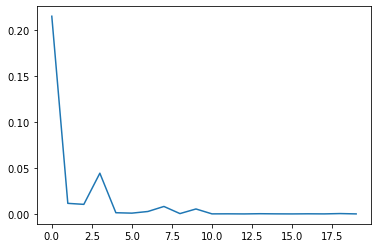

In [70]:
plt.plot(losses);

In [18]:
losses[-1]

0.00015369229367934167

In [19]:
len(losses)

20

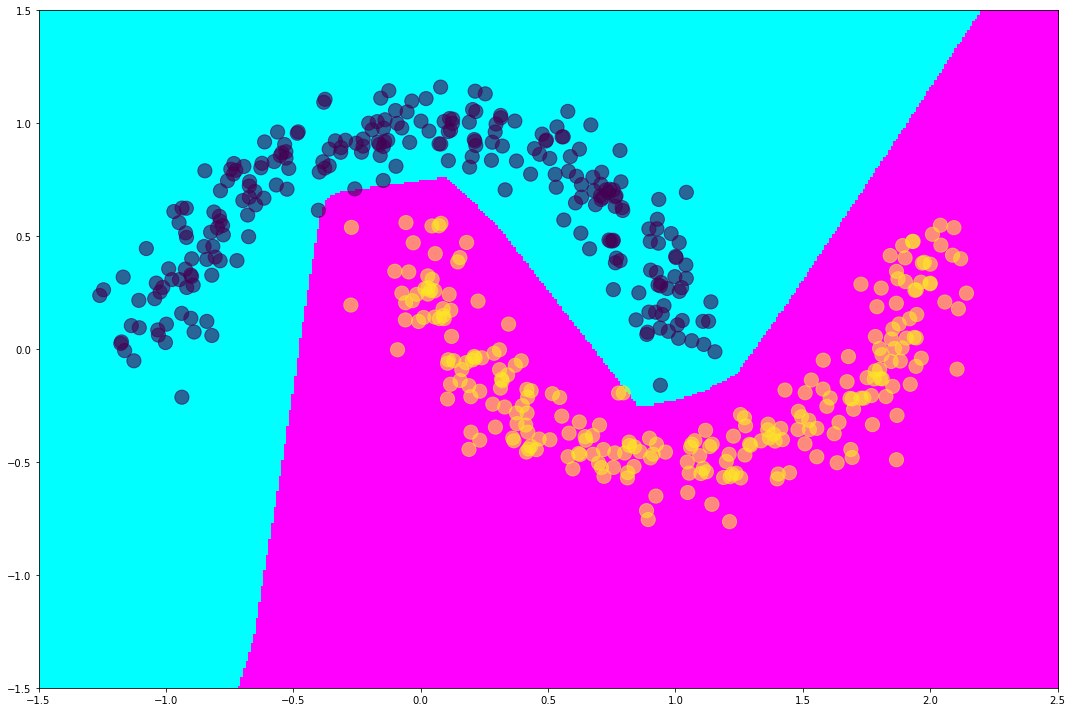

In [20]:
b0_min,b0_max = -1.5,2.5
b1_min, b1_max = -1.5, 1.5

xx,yy = np.meshgrid(np.arange(b0_min,b0_max,0.01),np.arange(b1_min,b1_max,0.01))

A = np.vstack((xx.ravel(), yy.ravel())).T

plt.figure(figsize=(15,10))

A_p = torch.from_numpy(A.astype('float32'))
Z = ann.predict(A_p)

Z = Z.reshape(xx.shape)
image = plt.imshow(Z, interpolation='nearest',
                       extent=(b0_min, b0_max, b1_min, b1_max),
                        aspect='auto', origin='lower', cmap='cool')

plt.scatter(X[:,0],X[:,1],c=y.reshape(1,-1)[0],s=200,alpha=0.6)
plt.tight_layout()
plt.show()